# EEP/IAS 118 - Introductory Applied Econometrics

## Problem Set 3, Spring 2023, Villas-Boas

#### <span style="text-decoration: underline">Due in Gradescope – see deadline due time  in Gradescope – Mar 7, 2023</span> 

Submit materials as **one pdf** on [Gradescope](https://www.gradescope.com/courses/492989). After uploading the pdf to Gradescope, please **assign appropriate pages to each question**. Questions that do not have assigned pages on Gradescope may not be graded. Codes and outputs not properly displayed will be marked as incorrect.

For the purposes of this class, we will be using Berkeley's _Datahub_ to conduct our analysis remotely using these notebooks.

If instead you already have an installation of R/RStudio on your personal computer and prefer to work offline, you can download the data for this assignment from bCourses (Make sure to install/update all packages mentioned in the problem sets in order to prevent issues regarding deprecated or outdated packages).

* The data files can be accessed directly  through _Datahub_ and do not require you to install anything on your computer. 
* Before submitting, make sure that all code cells are run with all output fully visible, and **do not print the entire dataset in your submission**. If you viewed the data earlier, remove that line of code and re-run the code cell (as datasets get bigger this adds many pages to pdf submissions and increases the likelihood we miss your answer).

*Note: Coding Bootcamp [Part 3](https://r.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2FENVECON-118-SP23&branch=main&urlpath=retro%2Ftree%2FENVECON-118-SP23%2F1_CodingBootcamp%2FCoding+Bootcamp+Part+3_2023.ipynb) and [Part 4](https://r.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2FENVECON-118-SP23&branch=main&urlpath=retro%2Ftree%2FENVECON-118-SP23%2F1_CodingBootcamp%2FCoding+Bootcamp+Part+4_2023.ipynb) covers all necessary R methods.

### Preamble
When writing R code, it's a good habit to start your notebooks or R scripts with a preamble, a section where you load all necessary packages, set paths or change the working directory, or declare other options.

Use the below code cell to load in packages you will use throughout the problem set (at least `haven`, `tidyverse`, and `ggplot2` this week). 

*Note:* **never** try to install packages on Datahub. All packages that you need are already installed and can be loaded immediately using the `library()` function. Attempting to install packages will create conflicts with the package versions on the server and potentially corrupt your notebook.

In [1]:
# include preamble code here
library(haven)
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1: Relationship between Housing Prices (in USD) and Characteristics of US Cities.

This exercise is to be completed using R. We will establish a simple linear relationship between **housing prices and characteristics of cities** in a sample of cities. This is called a hedonic regression, relating price to characteristics. The idea is that if a characteristic is valued in a city, demand for housing increases as people move there, and then housing price increases, all else constant. Vice versa, if people do not value a characteristic, like crime, for example.  

*Note: in economics, log always refers to the natural log, ln().*

### Data description

We will use September 2021 data from Zumper on one-bedroom apartment prices and 2019 data from the FBI on crime for US cities and other characteristics of US cities, such as number of bars, air quality index, wealth of the city measured by GDP, population, whether the city has a winning record majors sports team, as well as the number of sports teams in the major basketball, baseball and American football leagues. The data has 98 cities.

<center><b> Readme for data variables, several sources - collected by Villas-Boas, Fall 2021 </b></center>

|Variable name 	|	Definition	| Source    |
|:-:|:-|:-:|
| city | City name | |
| state | State name | |
|pricesept2021	|	One bedroom housing price, in USD	|	www.Zumper.com	|
|successteams	| Dummy variable =1 if at least one NBA, NFL, or MLB team in a city had a winning record last season (2020 season), =0 otherwise| Google search
|violentcrime2019	| Violent crimes (in thousands) | [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/tables/table-8/table-8.xls/view)
|numberbars	| Number of bars, count	| [www.yellowpages.com](www.yellowpages.com)
|aqi2020	| Annual 2020 air quality index (AQI) |	[EPA](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Annual)
|gdp	| Gross domestic product (billion $) |	[BEA](https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1&acrdn=5)
|popul2019	| 2019 population (in thousands of people)	| [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/tables/table-8/table-8.xls/view)
|nteams	| Number of major professional sports teams	| Google search


**1.** The dataset is in Stata format (.dta) and was created for the purpose of this problem set only. It is available on bcourses and Datahub and is called **Villas-Boas_2023pset3.dta**.

Read the data into R using
`my_data <- read_dta("Villas-Boas_2023pset3.dta")` 
and create a new variable, *gdpPc*, as the GDP per capita, defined as `gdp/popul2019`

In [2]:
# insert your code here
my_data <- read_dta("Villas-Boas_2023pset3.dta")
#my_data$gdpPc <- my_data$gdp/my_data$popul2019
my_data <- mutate(my_data, gdpPc = gdp/popul2019)
head(my_data)

city,state,pricesept2021,successteams,violentcrime2019,numberbars,aqi2020,gdp,popul2019,nteams,gdpPc
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Chandler,AZ,1450,0,0.593,79,119,237.47000,259.881,0,0.9137643
Gilbert,AZ,1660,0,0.245,29,119,237.47000,253.619,0,0.9363257
Glendale,AZ,1130,0,0.863,80,119,11.03773,253.951,0,0.0434640
Mesa,AZ,1160,0,1.953,16,119,237.47000,518.160,0,0.4582948
Phoenix,AZ,1260,1,11.803,425,119,237.47301,1688.722,3,0.1406229
Scottsdale,AZ,1850,0,0.415,229,119,11.32081,260.464,0,0.0434640


**2.** For each of the variables (including the newly created *gdpPc* variable), get (a) the sample mean, (b) the median, (c) the minimum, and (d) the maximum.

_Hint: see the section on `summary()` in Coding Bootcamp Part 1_

In [3]:
# insert your code here
summary(my_data)

     city              state           pricesept2021   successteams   
 Length:98          Length:98          Min.   : 600   Min.   :0.0000  
 Class :character   Class :character   1st Qu.: 925   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :1175   Median :0.0000  
                                       Mean   :1263   Mean   :0.2755  
                                       3rd Qu.:1440   3rd Qu.:1.0000  
                                       Max.   :2950   Max.   :1.0000  
 violentcrime2019   numberbars        aqi2020            gdp         
 Min.   : 0.120   Min.   :  16.0   Min.   : 20.00   Min.   :   9.28  
 1st Qu.: 1.276   1st Qu.: 120.2   1st Qu.: 41.00   1st Qu.:  34.06  
 Median : 2.486   Median : 209.0   Median : 44.00   Median :  81.99  
 Mean   : 4.641   Mean   : 331.6   Mean   : 51.01   Mean   : 178.24  
 3rd Qu.: 5.099   3rd Qu.: 425.0   3rd Qu.: 50.00   3rd Qu.: 217.32  
 Max.   :47.821   Max.   :2113.0   Max.   :119.00   Max.   :1573.86  
   popul2019 

**3.** Create a $\color{magenta}{\text{pink}}$ bars histogram for *pricesept2021*. Label everything: add axis titles and a main title.

_Hint: see the Histograms section of Coding Bootcamp Part 4_

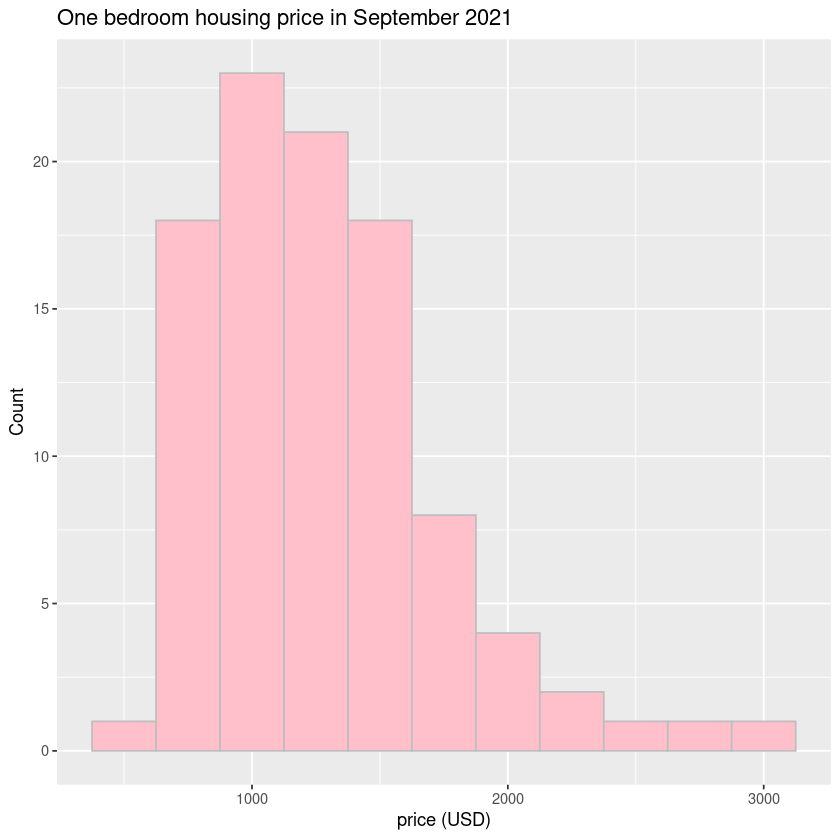

In [35]:
# insert your code here
ggplot(data = my_data, aes(x = pricesept2021)) +
    geom_histogram(binwidth = 250, colour = "grey", fill = "pink") +
    labs(title = "One bedroom housing price in September 2021",
        x = "price (USD)",
        y = "Count")

**4.** We will now compare housing across the two groups (group **successteams = 1** and **successteams = 0**) using the dataset. How many cities have at least one successful team and how many cities have no successful team?

In [5]:
# insert your code here
successful_team <- group_by(my_data, successteams)
summarize(successful_team, n())

successteams,n()
<dbl>,<int>
0,71
1,27


➡️ Type your written answer for _Exercise 1 Question 4_ here 

27 cities have at least one sucessful team and 71 cities have no successful teams

**5.** Draw separate histograms of the housing price in each group of cities, with and without successful teams.

*Hint: see the “Histograms” section of Coding Bootcamp Part 4*

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


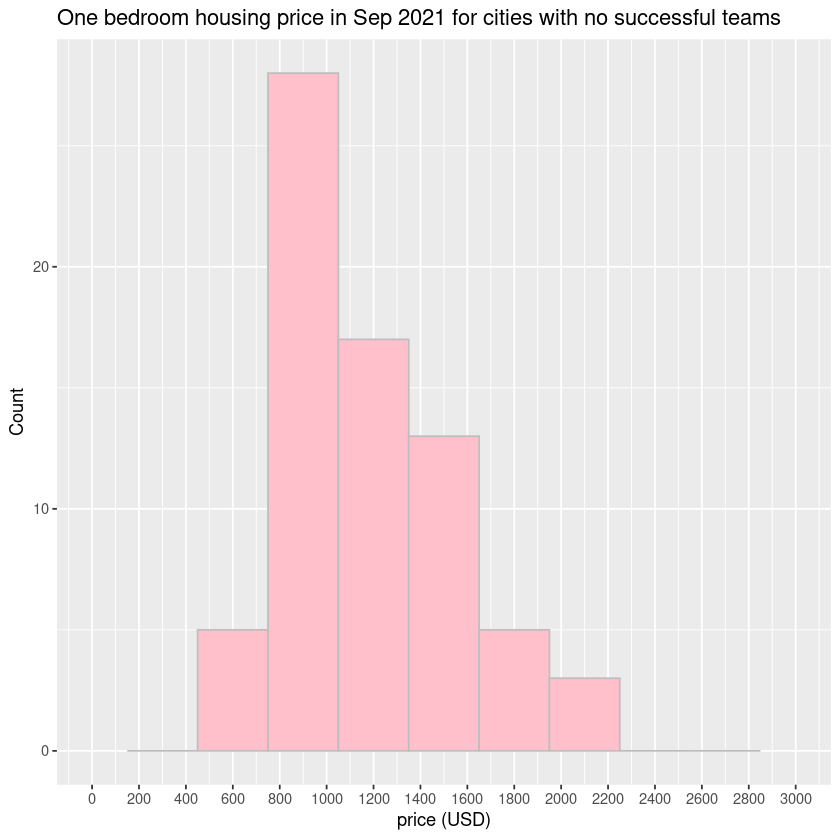

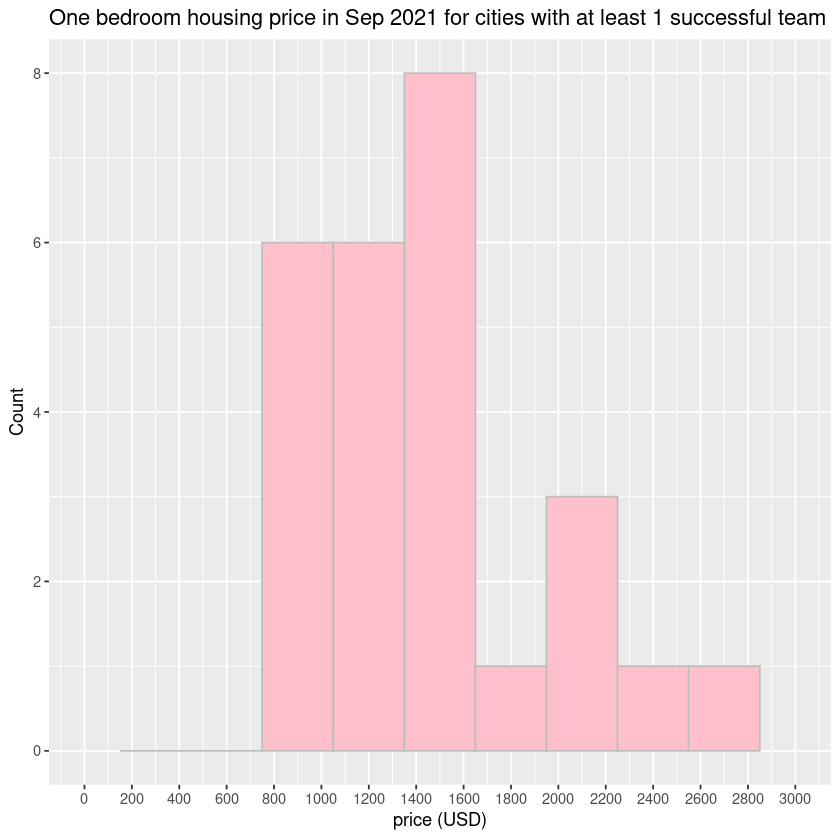

In [27]:
# insert your code here

#defaultW <- getOption("warn")
#options(warn = -1)

nosucc <- filter(my_data, successteams==0) 
somesucc <- filter(my_data, successteams==1) 

ggplot(data = nosucc, aes(x = pricesept2021)) +
    geom_histogram(binwidth = 300, colour = "grey", fill = "pink") +
    labs(title = "One bedroom housing price in Sep 2021 for cities with no successful teams",
        x = "price (USD)",
        y = "Count") +
        scale_x_continuous(breaks = seq(0, 3000, 200), lim = c(0, 3000))

ggplot(data = somesucc, aes(x = pricesept2021)) +
    geom_histogram(binwidth = 300, colour = "grey", fill = "pink") +
    labs(title = "One bedroom housing price in Sep 2021 for cities with at least 1 successful team",
        x = "price (USD)",
        y = "Count") +
        scale_x_continuous(breaks = seq(0, 3000, 200), lim = c(0, 3000))

#options(warn = defaultW)

**6.**	Overlap both histograms into the same graph and comment on differences (be precise - and explain why the differences intuitively make sense).

*Hint: see the “Stacking/Multiple Histograms” section of Coding Bootcamp Part 4*

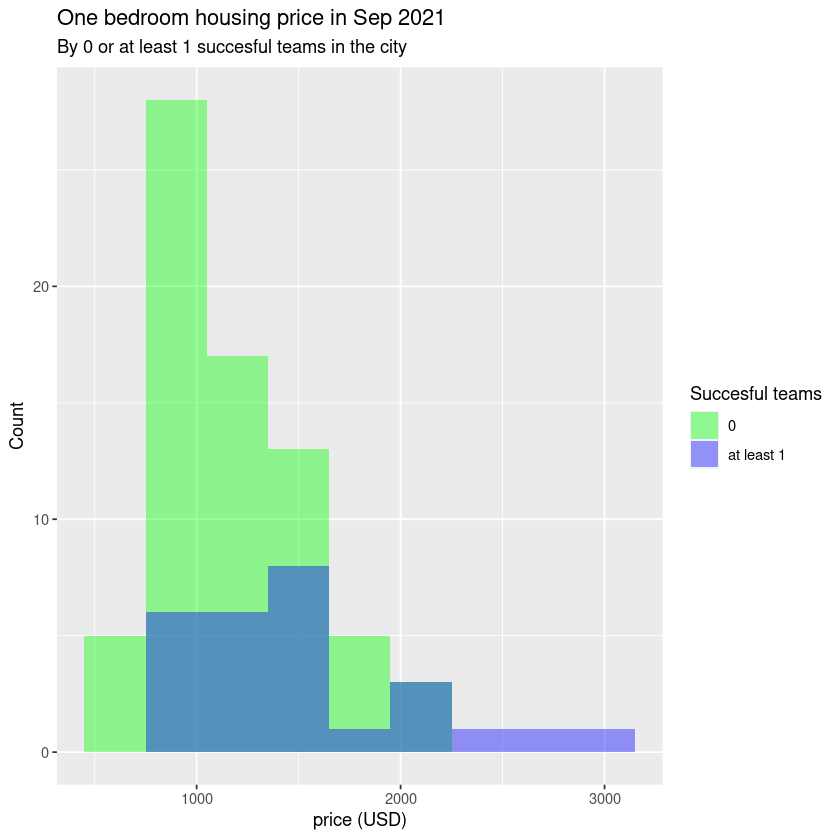

In [28]:
# insert your code here
ggplot(data = my_data, aes(x = pricesept2021)) +
    geom_histogram(aes(fill = factor(successteams)), position = "identity", 
                   alpha = 0.4, binwidth = 300) +
    labs(title = "One bedroom housing price in Sep 2021",
         subtitle = "By 0 or at least 1 succesful teams in the city",
         x = "price (USD)",
         y = "Count") +
    scale_fill_manual(name = "Succesful teams", 
                      labels = c("0", "at least 1"),
                      values = c("green", "blue"))

➡️ Type your written answer for _Exercise 1 Question 6_ here 

When the city has no successful teams, we find that the distribution of housing prices is skewed to the right. This makes sense because we would expect that some people would find cities with no succesful sports teams less apealing and so housing prices would be lower. However we find that the teams with at least one succesful sport team don't follow a continuous distirbution for the most part and this is probably because there are not many cities that even have a successful team, so the data is more varied but we still find some very high price values/outliers because those cities must be very popular. 

**7.**	Compute an estimate for the mean of the housing prices for the successful teams city group (**successteams=1**) in the data frame. Construct a 95% confidence interval for this mean. Give an interpretation of these results in a sentence.  

_(Hint: use `mean()` and `sd()` to get the necessary information to construct the CI)_

In [8]:
# insert code here
somesuccess <- filter(my_data, successteams==1) 
print("mean")
mean7 <- mean(somesuccess$pricesept2021)
mean7
print('standard deviation')
sd7 <- sd(somesuccess$pricesept2021)
sd7
print("confidence interval")
critval <- qt(0.975, nrow(somesuccess)-1)
c(mean7-critval*(sd7/sqrt(nrow(somesuccess))), mean7+critval*(sd7/sqrt(nrow(somesuccess))))

[1] "mean"


[1] 1507.407

[1] "standard deviation"


[1] 550.6262

[1] "confidence interval"


[1] 1289.587 1725.228

➡️ Type your answer to _Exercise 1 Question 7_ here 
The average housing price for successful teams city group is 1,507.40740740741 dollars with a standard deviation or variance of this housing price is $550.626165187574. 

The confidence interval states that with 95% probability this confidence interval has the true average housing price for sucessful teams city group. So specifically in this case we are 95% confident that our interval covers the true mean housing price for cities with at least one successful team between the values 1289.58695100891 dollars and upper end of 1725.2278638059 dollars.

**8.**	Let $D$ be the difference in prices between the cities with successful sports teams (**successteams=1**) and unsuccessful (**successteams=0**) groups. State an estimator $\hat{D}$ for $D$ and use the estimator to compute an estimate of $D$. Compute a standard error for $\hat{D}$. Derive a 90% confidence interval for $D$ and interpret in one sentence. 

In [9]:
# insert your code here
somesuccess <- filter(my_data, successteams==1) 
nosuccess <- filter(my_data, successteams==0) 
d_hat <- mean(somesuccess$pricesept2021) - mean(nosuccess$pricesept2021)
print('estimator')
d_hat
sd8some <- sd(somesuccess$pricesept2021)*sd(somesuccess$pricesept2021)
sd8none <- sd(nosuccess$pricesept2021)*sd(nosuccess$pricesept2021)
stderror8 <- sqrt((sd8some/nrow(somesuccess))+(sd8none/nrow(nosuccess)))
print("standard error")
stderror8
print("confidence interval")
critva8l <- qt(0.95, nrow(my_data)-2)
c(d_hat-critva8l*stderror8, d_hat+critva8l*stderror8)

[1] "estimator"


[1] 336.9849

[1] "standard error"


[1] 114.8092

[1] "confidence interval"


[1] 146.3004 527.6694

➡️ Type your answer to _Exercise 1 Question 8_ here 

The confidence interval states that with 90% probability this confidence interval has the true difference in prices between the cities with successful sports teams and unsuccessful groups. So specifically in this case we are 90% confident that our confidence interval contains the true difference in prices between the cities with successful sports teams and unsuccessful groups between the values of 146.3003644504 dollars and 527.66937994188 dollars.

**9.** Using the data frame, test whether the average of the housing values **pricesept2021** for the successful teams’ city group is statistically different at the 1% significance level ($\alpha$ = 0.01) from average housing values in the unsuccessful teams’ city group (that is, in terms of the hypothesis, the null is equal, and the alternative is not equal). (Recall the 5 step-procedure for hypothesis testing). 

In [10]:
# insert your code here
print('estimator')
d_hat

print("standard error")
stderror8

print("test stat")
test_stat9 <- (d_hat-0)/stderror8
test_stat9

print("degrees of freedom")
df9 <- nrow(somesuccess)+nrow(nosuccess)-2
df9

print("critical value")
critva8l <- qt(0.995, df9)
critva8l

print("reject?")
test_stat9 > critva8l

[1] "estimator"


[1] 336.9849

[1] "standard error"


[1] 114.8092

[1] "test stat"


[1] 2.935172

[1] "degrees of freedom"


[1] 96

[1] "critical value"


[1] 2.628016

[1] "reject?"


[1] TRUE

➡️ Type your answer to _Exercise 1 Question 9_ here 

This is a difference in means hypothesis test and we will be testing if cities with successful sports teams and unsuccessful groups have different average housing prices. So our question is the following: Are average housing prices different between cities with at least one successful sports team and cities with no successful teams? 

**Step 1)** The null and alternate hypotheses (assuming μ1 is average housing price for cities with at least one successful sports team and μ2 is the average housing price for cities with no successful sports teams): 

H0 : μ1 = μ2

H1 : μ1!= μ2

We can rewrite these hypotheses as:

H0 : D = μ1 −μ2 = 0

H1 : D = μ1 −μ2 != 0

**Step 2)** To calculate our test statistic we can use d_hat (estimator for difference in average housing prices for the two groups) from question 8 and standard error of d_hat from question 8 as well. From above we see that d_hat is 336.98487219614 dollars standard error of d_hat is 114.809223052337 dollars. From this information we can calculate the t statistic using the following formula:

t = (d_hat-d_h0)/se(d_hat) --> We know that d_h0 = 0 from step 1 so this will be d_hat/se(d_hat) = 336.98487219614/114.809223052337 = 2.93517248211429 and degrees of freedom for this t_stat (t_distribution) is 96

**Step 3)** Our significance level is 1% (𝛼 = 0.01) We have to use the t-table because the data frame is not very large, only 98 values total and DF are 96. The two tailed critical value is 2.62801584351007

**Step 4)** We reject the null hypothesis if |t| > |c|. In this case: |2.93517248211429| > |2.62801584351007| is a true statement, and so we reject the null that the differences in average housing price between the two city groups is 0

**Step 5)** Interpretation: We reject the null hypothesis. There is statistical evidence at the 1% level that the average housing prices is not the same in cities with at least one successful sports team and cities with no successful sports teams. 

**10.**	Let's now look at air quality in the data. **The U.S. AQI is EPA’s index for reporting air quality**. Draw a histogram for **aqi2020** and add a vertical red line at the EPA standard for Spare the Air Day AQI = 100. (https://www.airnow.gov/aqi/aqi-basics/)

For example, in the Bay Area, a Spare the Air Alert is called when air quality is forecast to be unhealthy, or above 100 in the AQI, in any one of the reporting zones. An alert may span over two days if air quality is expected to remain unhealthy for prolonged periods. If air quality is unhealthy in the Bay Area, it is almost always because of two kinds of air [pollutants](https://www.sparetheair.org/understanding-air-quality/air-pollutants-and-health-effects/whos-at-risk): [Ozone](https://www.sparetheair.org/understanding-air-quality/air-pollutants-and-health-effects/ozone) and [fine particulate matter, or PM2.5](https://www.sparetheair.org/understanding-air-quality/air-pollutants-and-health-effects/particulate-matter).

_Hint: see the "Lines" section of Coding Bootcamp Part 4_

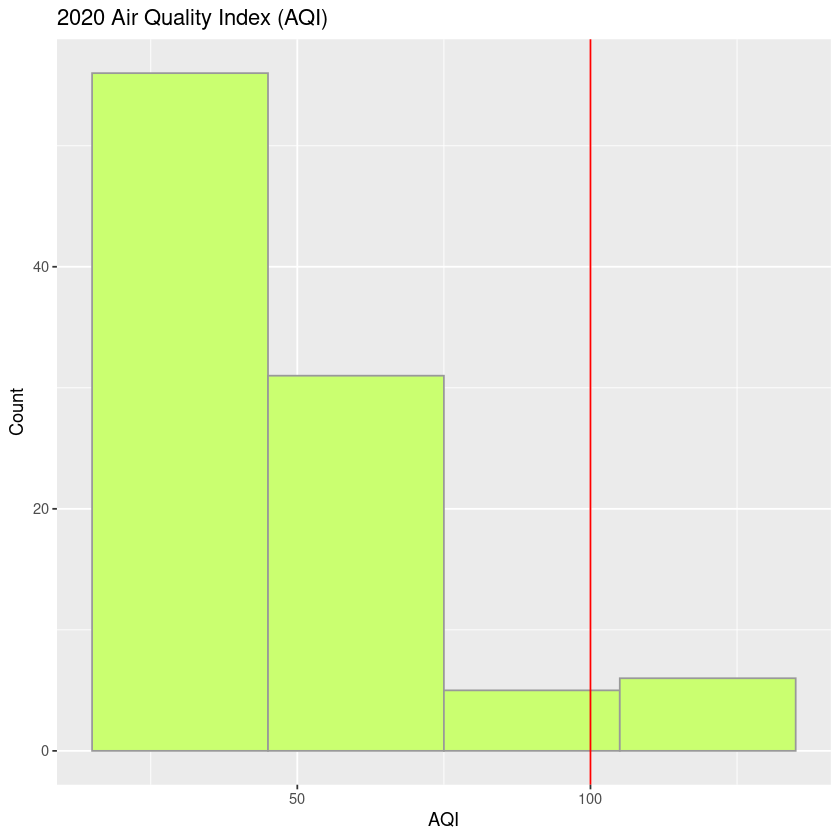

In [25]:
# insert your code here
ggplot(data = my_data, aes(x = aqi2020)) +
    geom_histogram(binwidth = 30, colour = "grey60", fill = "darkolivegreen1") +
    labs(title = "2020 Air Quality Index (AQI)",
        x = "AQI",
        y = "Count") +
        geom_vline(xintercept = 100, colour = "red") 

**11.**	(a) Regress **pricesept2021** on a constant, **successteams, violentcrime2019, aqi2020, numberbars, gdpPc**. (b) Generate a series of the predicted values of price and plot those against the price data series: What do you see in terms of fit? 


Call:
lm(formula = pricesept2021 ~ successteams + violentcrime2019 + 
    aqi2020 + numberbars + gdpPc, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-575.59 -263.55  -67.21  160.46 1415.88 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      789.8459   115.6321   6.831 8.94e-10 ***
successteams     101.6080   112.4484   0.904  0.36857    
violentcrime2019  -7.8547    12.2667  -0.640  0.52355    
aqi2020            5.1845     1.9341   2.681  0.00871 ** 
numberbars         0.6319     0.2539   2.489  0.01460 *  
gdpPc             15.9828    35.0096   0.457  0.64909    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 396.5 on 92 degrees of freedom
Multiple R-squared:  0.2699,	Adjusted R-squared:  0.2302 
F-statistic: 6.801 on 5 and 92 DF,  p-value: 1.94e-05


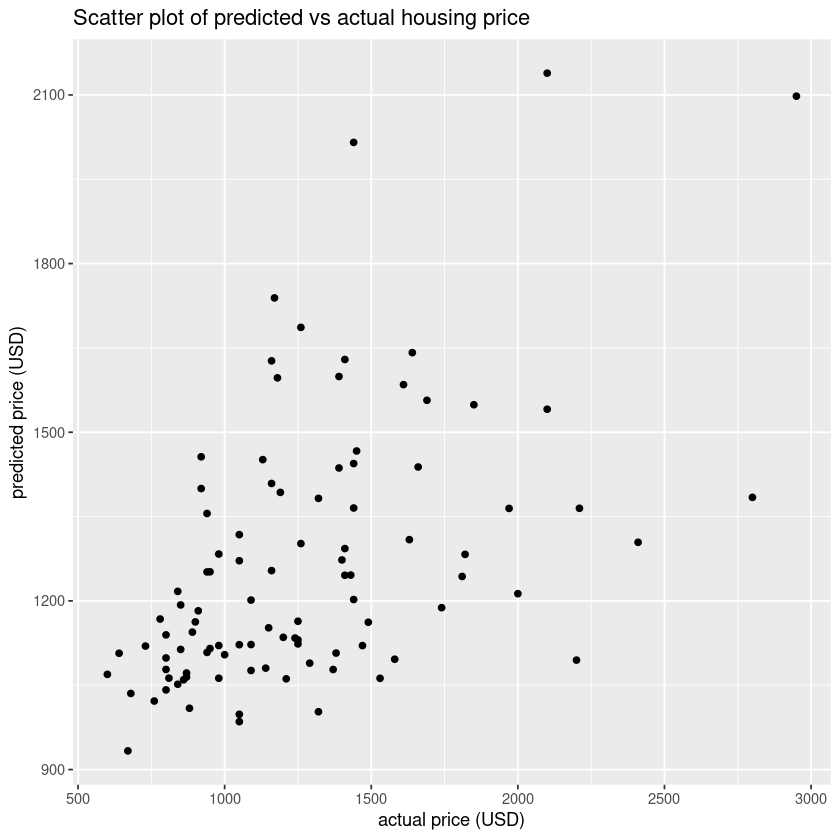

In [12]:
# insert your code here
reg11 <- lm(pricesept2021~successteams+violentcrime2019+aqi2020+numberbars+gdpPc, my_data)
predprice <- reg11$fitted.values
actprice <- my_data$pricesept2021

summary(reg11)

ggplot(data = my_data, aes(x = actprice, y = predprice)) +
    geom_point() +
    labs(title = "Scatter plot of predicted vs actual housing price",
        x = "actual price (USD)",
        y = "predicted price (USD)") 


➡️ Type your answer to _Exercise 1 Question 11_ here 

Plotting price and predicted values, I see that there does seem to be somewhat of a fit as we get an upward sloping pattern however the data is fairly scattered so its not the best or most perfect fit. In the case of a perfect fit I would expect to essentially see a 45 degree line where if the actual price for example is around 2000USD then the predicted price must also be exactly or very close to 2000USD but in this case we see there is much more variation. 

**12.**	What is the percent variation of housing prices that the model is explaining, and what percent is the model **NOT** explaining?

➡️ Type your answer to _Exercise 1 Question 12_ here 

Given that the Multiple R-squared:  0.2699, the percent variation of housing prices that the model is explaining is 26.99%. This means that the model is not explaining (100-26.99)% = 73.01% of the variation in housing prices 

**13.**	Compute the residuals series and plot the residuals on the vertical axis against **gdpPc** in the x axis, using `ggplot()`. When plotting, exclude the outlier city with gdpPc > 6, by setting the ggplot scale limits as follows: `lims(x = c(0, 6), y = c(-1000,1500))`. 

Is the constant variance assumption for the residuals valid or not for different levels of **gdpPc**, that is, of GDP per capita when you look at the scatter plot of the estimated residuals? 

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


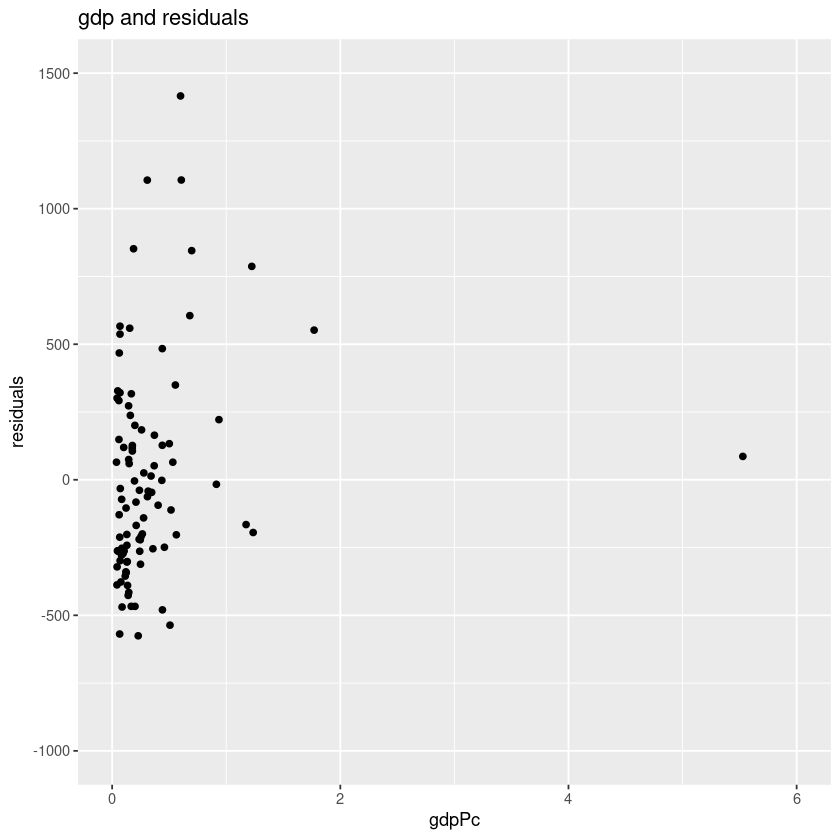

In [13]:
# insert your code here
resids11 <- reg11$residuals
gdppc11 <- my_data$gdpPc
ggplot(data = my_data, aes(x = gdppc11, y = resids11)) +
    geom_point() +
    labs(title = "gdp and residuals",
        x = "gdpPc",
        y = "residuals") + 
        lims(x = c(0, 6), y = c(-1000,1500))

➡️ Type your answer to _Exercise 1 Question 13_ here 

The constant variance assumption for the residuals is not valid for different levels of gdpPc (GDP per capita) because we see that the residuals are not roughly equal at different gdpPc values and seem to be most concentrated near 0-1 gdpPc

**14.**	Using the triplet Sign Size Significance (SSS), let’s interpret two of the coefficients from the model in Question 11. 

**(a)** What can you say of the effect of **aqi2020** on housing prices holding other factors constant? 


➡️ Type your answer to _Exercise 1 Question 14 part (a)_ here 

The coefficient for aqi2020 is 5.1845. This means that holding all other factors constant (successteams, violentcrime2019, numberbars, and gdpPc) a one unit increase in the 2020 air quality index leads to a $5.1845 USD increaes in the predicted one bedroom housing price (pricesept2021). The **sign** on the coefficient is positive which means an increase in AQI is associated with an increase in predicted housing price. The **size** refers to the interpratation that a one unit increase in AQI increases predicted housing price by 5.1845 USD. **significance** Given that the pvalue of aqi2020 is 0.00871 so the coefficient is statisically significant at the 1% level (which implies that it is also significant at the 5% and 10% level). 

**(b)** What about the coefficient on **successteams**? Use the (SSS) interpretation again.

The coefficient for successteams is 101.6080. This means that holding all other factors constant (aqi2020, violentcrime2019, numberbars, and gdpPc) if a city has at least one successful sports team, then the predicted one bedroom housing price increases by 101.6080 USD compared to the cities with any successful sports team. The **sign** on the coefficient is positive which means having at least one successful sports team is associated with an increase in predicted housing price. The **size** refers to the interpratation that having at least one successful sporst team increases predicted housing price by 101.6080 USD. **significance** Given that the pvalue of the coefficient of successteams is 0.36857, the coefficient is statistically insignificant at the 10,5, and 1% levels. 

➡️ Type your answer to _Exercise 1 Question 14 part (b)_ here (replacing this text)

**15.**	Given the estimated coefficients in Question 11's regression, and after you estimate the correlation between **gdpPc** and the air quality index across cities, what will happen to the estimated coefficient of **gdpPc** if you do not include the air quality index (**aqi2020**) in the estimated regression in question 11? Go through the Omitted Variable formula and explain briefly.

In [14]:
# insert your code here
cor(my_data$gdpPc,my_data$aqi2020)

[1] -0.06319911

➡️ Type your answer to _Exercise 1 Question 15_ here 

The estimated correlation between gdpPc and air quality index across cities is -0.063199112286013.

Using the formula:

Sign(bias) = Sign(coefficient for aqi2020) * sign(cor(gdpPc,aqi2020))

We know that the coefficient for aqi2020 is positive and the correlation between gpdPc and aqi2020 is negative which means our bias is negative, or moving in the negative direction (downward bias). This means that if we exclude aqi2020 in the model then the estimated coefficient on gdpPc would decrease and move towards the downward direction (decreasing). 


**16.**	Now estimate the model in Question 11 but do not include **aqi2020**. What is the new estimate of the coefficient on **gdpPc**, and do you confirm your answer in Question 15? 

In [15]:
# insert your code here
reg11 <- lm(pricesept2021~successteams+violentcrime2019+numberbars+gdpPc, my_data)
summary(reg11)


Call:
lm(formula = pricesept2021 ~ successteams + violentcrime2019 + 
    numberbars + gdpPc, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-544.57 -301.62  -68.01  136.82 1389.77 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1059.3375    58.9938  17.957   <2e-16 ***
successteams       99.8329   116.1256   0.860   0.3922    
violentcrime2019   -4.5236    12.6029  -0.359   0.7205    
numberbars          0.5750     0.2613   2.201   0.0302 *  
gdpPc              13.7449    36.1448   0.380   0.7046    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 409.4 on 93 degrees of freedom
Multiple R-squared:  0.2129,	Adjusted R-squared:  0.179 
F-statistic: 6.287 on 4 and 93 DF,  p-value: 0.0001599


➡️ Type your answer to _Exercise 1 Question 16_ here 

The new coefficient estimate for gdpPc is 13.7449 whereas in question 11 it was 15.9828  which confirms that the bias moves towards the negative direction when we omit aqi2020. 

**17.**	What happens to the R squared ($R^2$) when you do not include the **aqi2020** variable in the equation compared to the R squared in Question 11?

In [16]:
# insert your code

➡️ Type your answer to _Exercise 1 Question 17_ here 

The r-squared for the model which included aqi2020 was 0.2699 and when you do not include aqi2020 the r-squared decreased to 0.2129 which means that including aqi2020 helped increase and explain the variance in housing price. 

## Exercise 2: Survey Evidence Towards Safe Working Conditions of Essential Workers during COVID

Two former EEP majors and I have a co-authored a forthcoming paper in the _Applied Economics Perspectives and Policy_ journal, using survey data to investigate consumer preferences towards sustainable food and products manufactured under safe working conditions of essential labor during the COVID pandemic[<sup>1</sup>](#fn1). 

We ask survey respondents some basic demographics, and also whether they or a loved one were exposed or had COVID in early 2020. Then we ask them to make choices among food options that vary in price and also vary in whether they are produced under safe essential labor conditions. Based on stated survey responses we summarize the choices consistent with respondents preferring the safe labor working conditions product. We also break up the agreement with choosing worker-safe products for respondents that were exposed to COVID in 2020 either directly or through a loved one, and those that were not exposed.

 | | Percent choosing Safe Worker Condition Product | Total number of respondents |
 |:--|:--:|:--:|
 | Overall | 64.42% | 860 |
 | Exposed to COVID | 67.89% | 601 |
 | Not Exposed to COVID | 56.37% | 259 |

 Let $p$ be the fraction of respondents that opt to choose the safe working condition products.

**1.**	Use the survey results to estimate $p$. Also estimate the standard error of your estimate. 

In [17]:
# insert any code here for using R as your calculator
p_hat <-  64.42/100
n_q1 <- 860
stnderro <- sqrt((p_hat*(1-p_hat))/n_q1)
stnderro

[1] 0.01632541

➡️ Type your answer to _Exercise 2 Question 1_ here 

p_hat or the estimate of p is .6442 and the standard error is 0.0163254103548981

**2.**	Construct a 95% confidence interval for $p$. Interpret. 

In [18]:
# insert any code here for using R as your calculator
c(p_hat - 1.96 * stnderro , p_hat + 1.96 * stnderro)

[1] 0.6122022 0.6761978

➡️ Type your answer to _Exercise 2 Question 2_ here 

We learn that with 95% probability this confidence interval has the true p, the true fraction of respondents that opt to choose the safe working condition products and it is between 0.6122021957044 to 0.6761978042956 or 61.22021957044% to 67.61978042956%

I followed the Z (normal) distribution because the sample size n is large and formed a rejection region on each tail as 2.5% and found the 1.96 value.

**3.**	Construct a 99% confidence interval for $p$. Is it larger or narrower than the 95% confidence interval? Why? 

In [19]:
# insert any code here for using R as your calculator
c(p_hat - 2.576 * stnderro , p_hat + 2.576 * stnderro)

[1] 0.6021457 0.6862543

➡️ Type your answer to _Exercise 2 Question 3_ here 

We learn that with 99% probability this confidence interval has the true p, the true fraction of respondents that opt to choose the safe working condition products and it is between 0.602145742925782 to 0.686254257074217 or 60.2145742925782% to 68.6254257074217%

I followed the Z (normal) distribution because the sample size n is large and formed a rejection region on each tail as .5% and found the 2.576 value.

This interval is larger than the 95% confidence interval because we are essentially increasing our confidence level, so we have to have a larger range of values to avoid error given that the confidence interval is randomized

**4.**	Is there statistical evidence that more than 60% of respondents chose the labor safe product? Use the 5 steps for hypothesis testing with a 5% significance level. 

In [20]:
# insert any code here for using R as your calculator
(p_hat - .60)/stnderro
qnorm(.95)

[1] 2.707436

[1] 1.644854

➡️ Type your answer to _Exercise 2 Question 4_ here 

**Step 1)** The null and alternate hypotheses: 

H0 : p <= 60% (the true fraction of respondents that opt to choose the safe working condition products less than or equal to 60%)

H1 : p > 60% (the true fraction of respondents that opt to choose the safe working condition products greater than 60%)


**Step 2)** To calculate our test statistic we would use firstly a z (normal) distribution given a large sample size n and estimate using phat and standard error of phat as follows: z = (p_hat - p_h0)/ se(p_hat) = (.6442 - .60)/0.0163254103548981 = 2.70743577276995

**Step 3)** Our significance level is 5% (𝛼 = 0.05) We can use the normal distribution (z-table) because the data frame is larger and the one tailed critical value comes out to 1.64485362695147

**Step 4)** We reject the null hypothesis if |t| > |c|. In this case: |2.70743577276995| > |1.64485362695147| is a true statement, and so we reject the null that the proportion of respondants that chose labor safe products is less than 60%. 

**Step 5)** Interpretation: We reject the null hypothesis. There is statistical evidence at the 5% level that more than 60% of respondents chose the labor safe product

**5.**	Is there statistical evidence that opting to choose the labor safe product is more likely for respondents that were directly exposed to COVID (or through a loved one) compared to respondents that were not exposed at the 1% significance level? Explain (to answer this question use the 5 steps for hypothesis testing). 

In [21]:
# insert any code here for using R as your calculator
p_chat = .6789
cn = 601
p_nhat = .5637
nn = 259
diff_estimate <- p_chat - p_nhat
diff_estimate
pooled_p <- ((cn*p_chat)/(cn+nn))+((nn*p_nhat)/(cn+nn))
pooled_p
se_dff <- sqrt(((pooled_p*(1-pooled_p))/(cn))+((pooled_p*(1-pooled_p))/(nn)))
se_dff
test_stat <- diff_estimate/se_dff
test_stat
qnorm(.99)

[1] 0.1152

[1] 0.644206

[1] 0.03558556

[1] 3.237268

[1] 2.326348

➡️ Type your answer to _Exercise 2 Question 5_ here 

**Step 1)** The null and alternate hypotheses where p_c is the true proportion of respondants directly exposed to covid and p_n is the true proportion of respondants not exposed to covid: 

H0 : p_c = p_n

H1 : p_c > p_n

or alternatively 

H0 : p_c - p_n = 0

H1: p_c - p_n > 0 


**Step 2)** To calculate our test statistic we would use firstly a z (normal) distribution given a large sample size n and estimate using d_hat and standard error of d_hat where d_hat is the difference of the estimated proportion of respondants directly exposed to covid or not as (phat_c - phat_n) as follows: z = (d_hat - h0)/ se(d_hat) = (0.1152 - 0)/0.644206046511628 = 3.23726827706166

Where the standard error is calculated using the pooled p_hat estimate from above code since the groups come from the same underlying distribution of choosing safe worker condition products 

**Step 3)** Our significance level is 1% (𝛼 = 0.01) We can use the normal distribution (z-table) because the data frame is big and the one tailed critical value comes out to 2.32634787404084

**Step 4)** We reject the null hypothesis if |t| > |c|. In this case: |3.23726827706166| > |2.32634787404084| is a True statement, and so we reject the null that the opting to choose the labor safe product is more likely for respondents that were directly exposed to COVID (or through a loved one) compared to respondents that were not exposed at the 1% significance level.

**Step 5)** Interpretation: We reject the null hypothesis. There is signifcant statistical evidence at the 1% level that the opting to choose the labor safe product is more likely for respondents that were directly exposed to COVID (or through a loved one) compared to respondents that were not exposed at the 1% significance level.


**Please remember to submit your Jupyter Notebook displaying all codes and output.**

<span id="fn1"> Link to the working paper with Nica and Jackie: https://escholarship.org/uc/item/0nv2n39w.</span>